## **Waste Segregation Automation**
### Object Detection & Tracking

This project is aimed at automating waste segregation process during industrial recycling by using Object Detection & tracking to discriminate between contaminants in a stream of waste and highlight them to RPA monitored process for quick & efficient extraction.
The below code performs a transfer-tuning operation on the YOLOv11 model to adapt it to our specific use case and to the 2 test classes of organic & plastic waste. Finally, Waste Tracking is implemented through the allied ByteSort Algorithm.
<br>

Table of Contents :
- [Installing Dependancies](#installing-dependancies)
- [Environment Setup](#environment-setup)
- [Model Training](#model-training)
- [Model Validation](#model-validation)
- [Testing & Inference](#model-testing--inference)

#### **Installing Dependancies**

In [1]:
!pip install opencv-python deep_sort_realtime
!pip install -q ultralytics
!pip install roboflow

#### **Environment Setup**

In [ ]:
import cv2
from ultralytics import YOLO
from getpass import getpass

In [1]:
import torch
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


#### **Model Training**

In [5]:
# Load the YOLOv11m model
model = YOLO('yolo11n.pt')

# Train the model
model.train(
    data='dataset/data.yaml',  
    epochs=10,
    imgsz=[1080, 1920],
    batch=8,
    project='runs/train',
    name='yolo11m_custom'
)

100%|██████████| 5.35M/5.35M [00:01<00:00, 3.60MB/s]


Ultralytics 8.3.160 🚀 Python-3.12.4 torch-2.6.0 CPU (Apple M3 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=[1080, 1920], int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11m_custom10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

train: Scanning /Users/nitinjangir/Downloads/dataset/labels/train.cache... 444 images, 23 backgrounds, 0 corrupt: 100%|██████████| 444/444 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 826.8±147.4 MB/s, size: 222.2 KB)



val: Scanning /Users/nitinjangir/Downloads/dataset/labels/val.cache... 33 images, 4 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]


Plotting labels to runs/train/yolo11m_custom10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 1920 train, 1920 val
Using 0 dataloader workers
Logging results to runs/train/yolo11m_custom10
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.682      11.17      2.335          5       1920: 100%|██████████| 56/56 [14:50<00:00, 15.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:29<00:00,  9.82s/it]

                   all         33         51    0.00374      0.725     0.0333    0.00734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/10         0G      1.616      8.192      2.241          7       1920: 100%|██████████| 56/56 [14:49<00:00, 15.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.63s/it]

                   all         33         51      0.219      0.176     0.0845     0.0166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/10         0G      1.579      6.673      2.176          6       1920: 100%|██████████| 56/56 [15:04<00:00, 16.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:29<00:00,  9.82s/it]

                   all         33         51      0.504      0.392      0.474      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/10         0G      1.601      5.593      2.256          5       1920: 100%|██████████| 56/56 [15:08<00:00, 16.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.60s/it]

                   all         33         51      0.276      0.431      0.198     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.558      4.711      2.164          5       1920: 100%|██████████| 56/56 [14:50<00:00, 15.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.17s/it]

                   all         33         51      0.303      0.529      0.259      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/10         0G      1.436      4.093      2.029          5       1920: 100%|██████████| 56/56 [14:55<00:00, 15.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.05s/it]

                   all         33         51      0.565      0.588      0.599      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/10         0G      1.448      3.619      2.024          5       1920: 100%|██████████| 56/56 [14:42<00:00, 15.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.08s/it]

                   all         33         51      0.695      0.759      0.772      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/10         0G      1.358      3.319      1.886          7       1920: 100%|██████████| 56/56 [14:33<00:00, 15.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.06s/it]

                   all         33         51      0.743      0.725      0.802      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/10         0G      1.242       2.99      1.774          6       1920: 100%|██████████| 56/56 [14:45<00:00, 15.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.02s/it]

                   all         33         51       0.65      0.765      0.724      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/10         0G      1.205      2.796      1.715          4       1920: 100%|██████████| 56/56 [14:37<00:00, 15.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.08s/it]

                   all         33         51      0.844      0.765      0.864      0.456

10 epochs completed in 2.550 hours.


Optimizer stripped from runs/train/yolo11m_custom10/weights/last.pt, 5.7MB
Optimizer stripped from runs/train/yolo11m_custom10/weights/best.pt, 5.7MB

Validating runs/train/yolo11m_custom10/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.12.4 torch-2.6.0 CPU (Apple M3 Pro)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.56s/it]


                   all         33         51      0.844      0.765      0.855      0.456
Speed: 2.9ms preprocess, 763.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/train/yolo11m_custom10


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x328e33ef0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

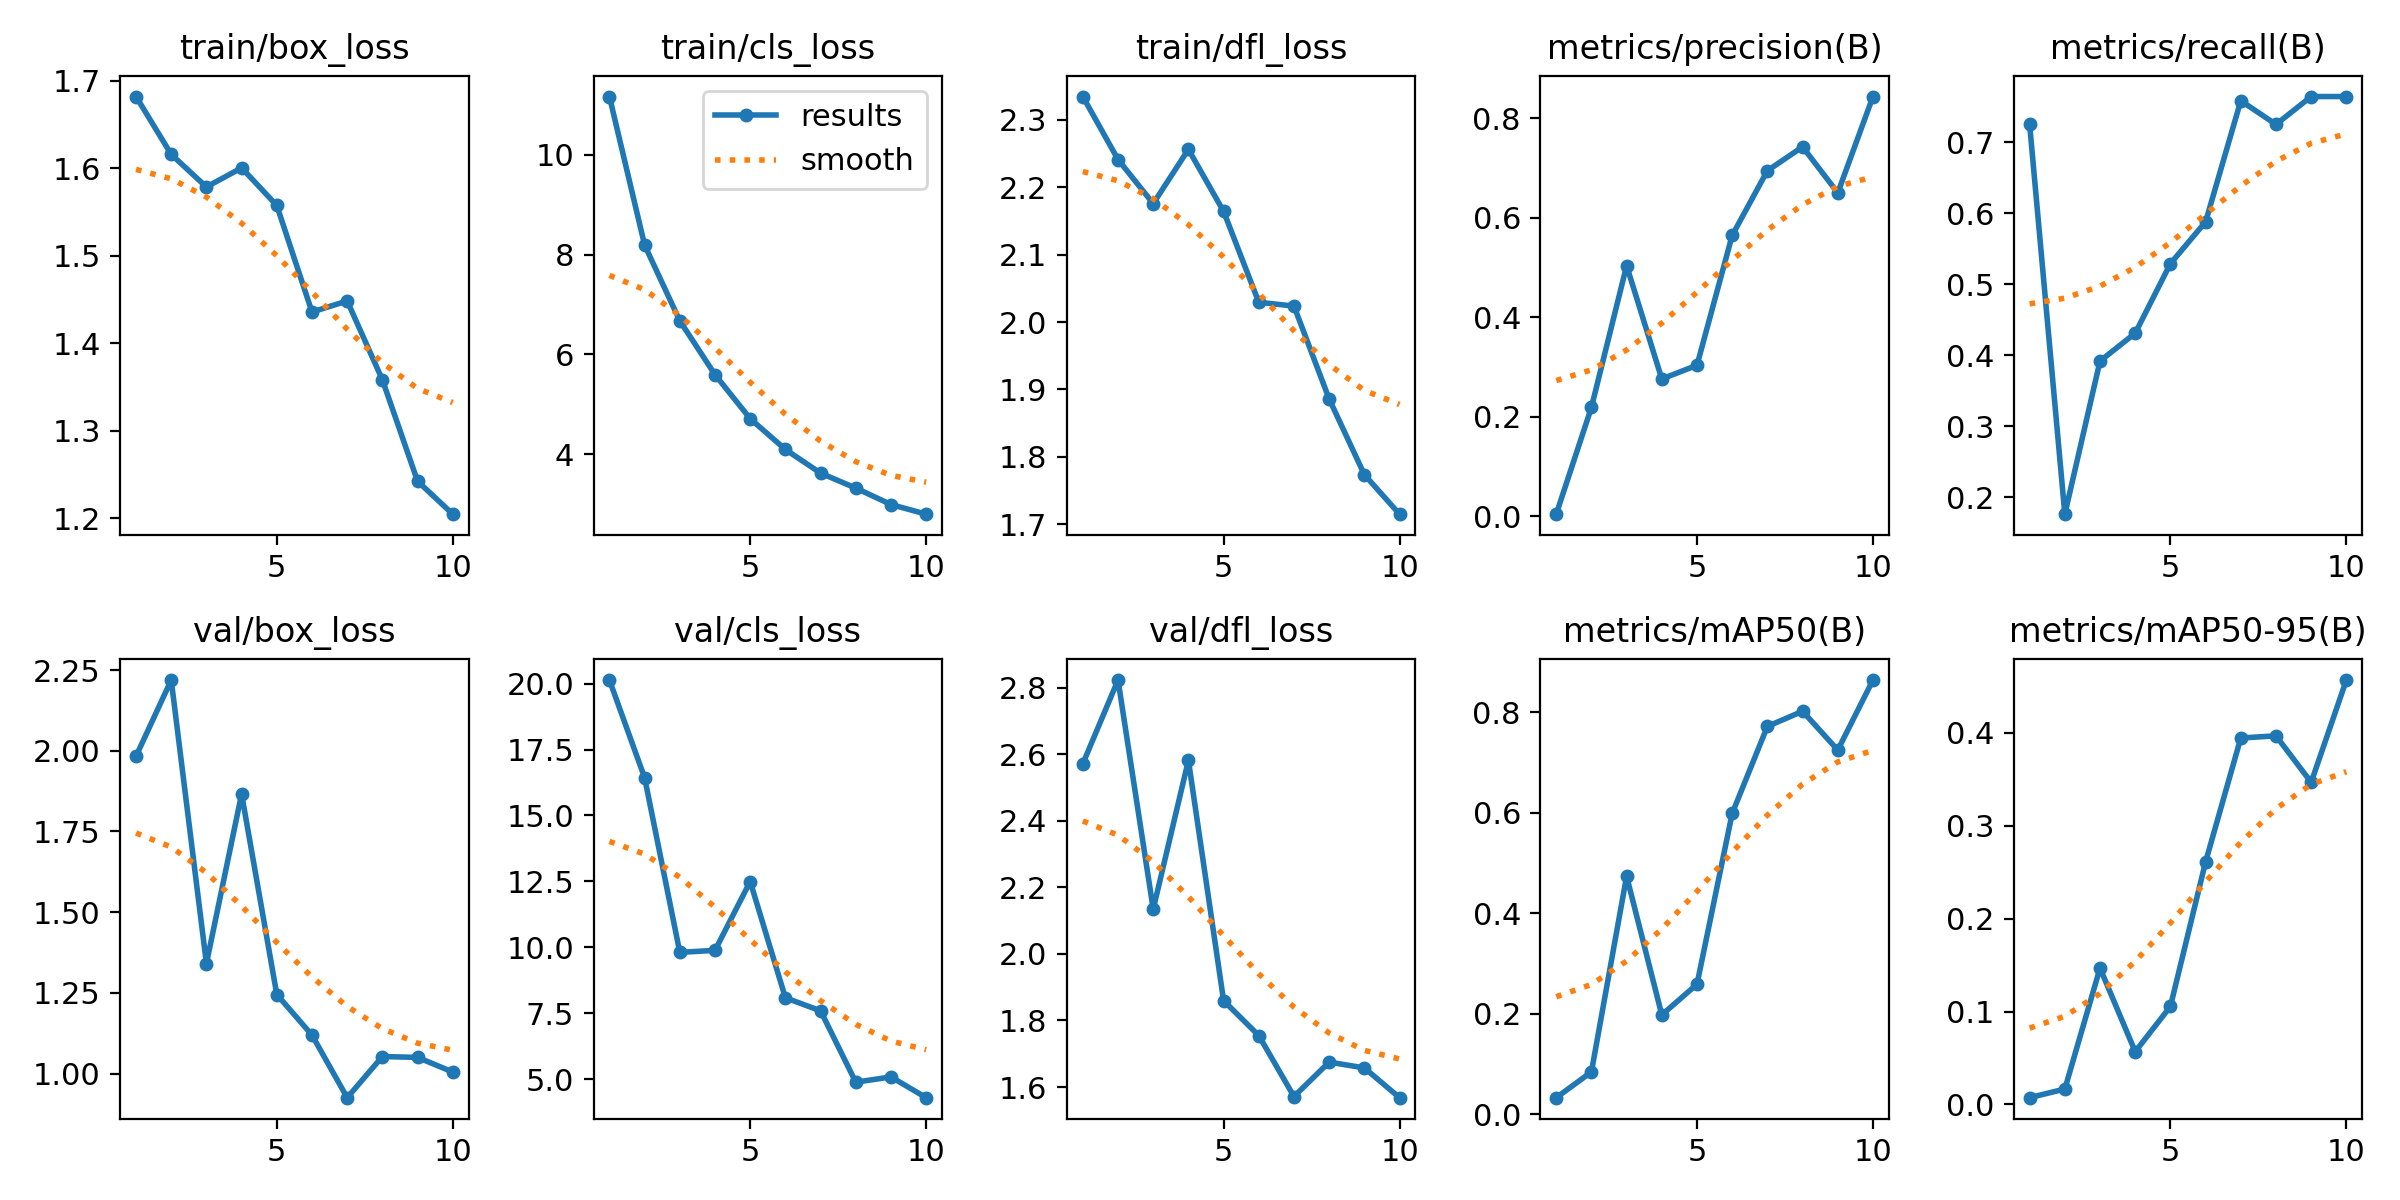

In [9]:
display(Image(filename="runs/train/yolo11m_custom10/results.png"))

#### **Model Validation**

In [6]:
metrics = model.val(data='dataset/data.yaml')
print("Validation Metrics:")
print(metrics)

Ultralytics 8.3.160 🚀 Python-3.12.4 torch-2.6.0 CPU (Apple M3 Pro)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2761.4±1869.8 MB/s, size: 205.2 KB)


val: Scanning /Users/nitinjangir/Downloads/dataset/labels/val.cache... 33 images, 4 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.71s/it]


                   all         33         51      0.844      0.765      0.855      0.456
Speed: 3.0ms preprocess, 242.0ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/train/yolo11m_custom102
Validation Metrics:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x321b4b020>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.

In [ ]:
from IPython.display import display, HTML
import os

val_dir = "runs/train/yolo11m_custom102"
for fname in ["PR_curve.png", "confusion_matrix.png", "val_batch0_pred.jpg"]:
    fpath = os.path.join(val_dir, fname)
    if os.path.exists(fpath):
        display(HTML(f"<img src='{fpath}' width='600'>"))


### **Model Testing & Inference**

In [2]:
model = YOLO("runs/train/yolo11m_custom10/weights/best.pt")

In [ ]:
#Note : .track() method calls both YOLO fine tuned model & ByteSORT tracking algoritm simultaneously
tracker_output = model.track("test2.mp4", conf=0.9, persist=True, save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/525) /Users/nitinjangir/Desktop/DL Group Assignment/test2.mp4: 416x640 (no detections), 27.7ms
video 1/1 (frame 2/525) /Users/nitinjangir/Desktop/DL Group Assignment/test2.mp4: 416x640 (no detections), 29.0ms
video 1/1 (frame 3/525) /Users/nitinjangir/Desktop/DL Group Assignment/test2.mp4: 416x640 (no detections), 26.8ms
video 1/1 (frame 4/525) /Users/nitinjangir/Desktop/DL Group Assignment/test2.mp4: 416x640 (no detections), 26.4ms


In [ ]:
#function to count unique number of IDs
from collections import defaultdict

id_frame_counts = defaultdict(int)

# Process each frame result
for result in tracker_output:
    if result.boxes and result.boxes.id is not None:
        ids = result.boxes.id.cpu().numpy().astype(int)
        # Use a set to count an ID only once per frame
        for id_ in set(ids):
            id_frame_counts[id_] += 1

# Filter IDs that appear in more than 20 frames
filtered_ids = [id_ for id_, count in id_frame_counts.items() if count > 20]
unique_ids = set(filtered_ids)

print(f"Total unique tracked objects (seen >10 frames): {len(unique_ids)}")
print(f"IDs: {sorted(filtered_ids)}")

Total unique tracked objects (seen >10 frames): 3
IDs: [np.int64(1), np.int64(4), np.int64(5)]
